## K-Nearest Neighbors (KNN)

In [32]:
# Import all required libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean, std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [59]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))
pima = pickle.load(open("./common/pima.p", "rb"))

X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

feature_cols = pickle.load(open("./common/feature_cols.p", "rb"))

### Find the best combination for KNN 

In [34]:
# Define the parameter values that should be searched
k_range = list(range(1, 31))
# leaf_size_range = list(range(1, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# param_grid = dict(n_neighbors=k_range, leaf_size=leaf_size_range)
param_grid = dict(n_neighbors=k_range)

In [35]:
# Instantiate the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_macro')

In [36]:
# Fit the grid with data
grid.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: Data

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='f1_macro')

In [37]:
# View the results
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best Score: 0.8479811105939312
Best Parameters: {'n_neighbors': 3}


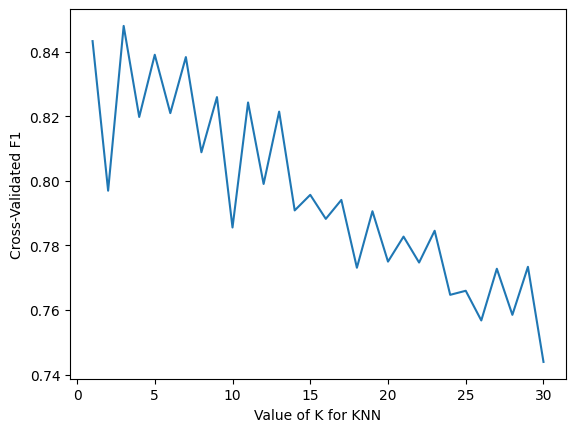

In [38]:
# Plot for KNN only
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F1')
plt.show()

# Plot for KNN and leaf size
# # Get the mean test scores for each combination of parameters
# grid_mean_scores = grid.cv_results_['mean_test_score']

# # Reshape the scores into a 2D array with shape (len(k_range), len(leaf_size_range))
# grid_mean_scores_array = np.array(grid_mean_scores).reshape(len(k_range), len(leaf_size_range))

# # Take the mean score across all leaf sizes for each n_neighbors value
# mean_scores = grid_mean_scores_array.mean(axis=1)

# plt.plot(k_range, mean_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated F1')
# plt.show()

In [39]:
# Get best n_neighbors
best_n_neighbors = grid.best_params_.get('n_neighbors')
best_n_neighbors

# Get best leaf_size
# best_leaf_size = grid.best_params_.get('leaf_size')
# best_leaf_size

3

In [40]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': [best_n_neighbors], 'weights': ['uniform'], 'algorithm': ['auto'], 'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'], 'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Use 'f1_macro' as the scoring method
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for _mean, _std, _params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (_mean, _std * 2, _params))

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
from sklearn.metrics import classification_report
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: Data

Best parameters set found on development set:
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Grid scores on development set:
0.848 (+/-0.056) for {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.842 (+/-0.054) for {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.835 (+/-0.036) for {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.833 (+/-0.052) for {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}
0.832 (+/-0.044) for {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}
0.832 (+/-0.044) for {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 6, 'weights': 'uniform'}
0.831 (+/-0.045) for {'algorithm'

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [41]:
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

### Perform Cross Validation

In [60]:
# Define the model
clf_cv = KNeighborsClassifier(n_neighbors=3, n_jobs=-1, weights='uniform', algorithm='auto', leaf_size=1, p=2, metric='minkowski')
clf_cv = KNeighborsClassifier()

# Define metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']

# Define the cross-validation procedure
cv = KFold(n_splits=10)

# Evaluate the model using cross-validation
# demo_cols = ["cpu_usage","memory_usage","bandwidth_inbound","bandwidth_outbound","response_time"]
# X = X[demo_cols]
scores = cross_validate(clf_cv, X, y, scoring=scoring, cv=cv, n_jobs=-1)

In [61]:
# Print scores
print('MACRO:')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))
print('')
print('MICRO:')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_micro']), std(scores['test_precision_micro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_micro']), std(scores['test_recall_micro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_micro']), std(scores['test_f1_micro'])))

MACRO:
Precision: 0.902 (0.089)
Recall: 0.869 (0.118)
F1 score: 0.882 (0.106)

MICRO:
Precision: 0.954 (0.048)
Recall: 0.954 (0.048)
F1 score: 0.954 (0.048)


### Feature Importance

In [29]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train, y_train)

# Use Permutation Feature Importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

for i in sorted_idx:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{feature_cols[i]:<8} "
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


cpu_usage 0.000 +/- 0.000
memory_usage 0.000 +/- 0.000
tps      0.000 +/- 0.000
response_time 0.069 +/- 0.009
bandwidth_outbound 0.141 +/- 0.010
bandwidth_inbound 0.142 +/- 0.009


### Train the model

In [22]:
# Create and train the model
clf = KNeighborsClassifier(n_neighbors=best_n_neighbors, n_jobs=-1, weights='uniform', algorithm='auto', leaf_size=1, p=2, metric='minkowski')
clf.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=3)

In [23]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [24]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9745958429561201
Precision: 0.8709677419354839
Recall: 0.7941176470588235
F1: 0.8307692307692308


### Visualize the model

In [25]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[395,   4],
       [  7,  27]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

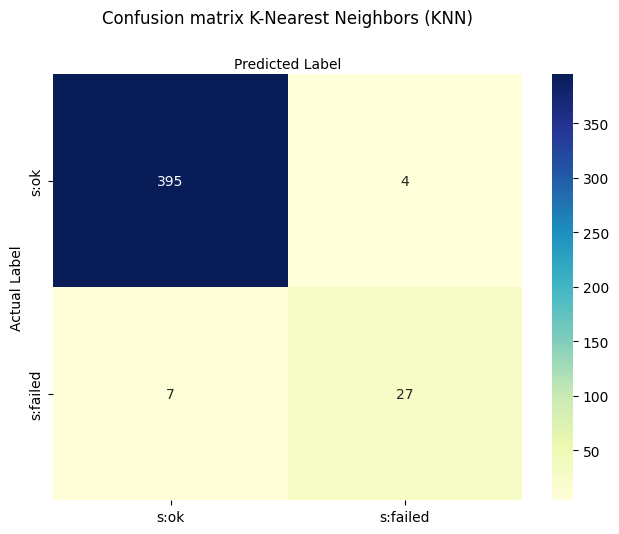

In [26]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix K-Nearest Neighbors (KNN)', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [27]:
pickle.dump(clf, open("./models/knn.p", "wb"))